# Embedding

In [2]:
import numpy as np
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from graspy.embed import AdjacencySpectralEmbed
from graspy.simulations import sbm
from graspy.plot import heatmap, pairplot
import matplotlib.pyplot as plt

%matplotlib inline

<AxesSubplot:title={'center':'Directed'}>

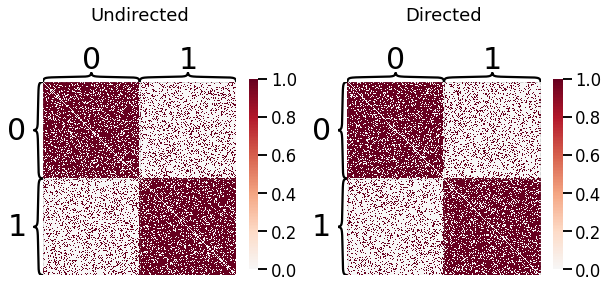

In [3]:
nodes = 100
labels_sbm = [0]*nodes + [1]*nodes
P = np.array([[.8, .2],
              [.2, .8]])
undirected_sbm = sbm(2*[nodes], P)
directed_sbm = sbm(2*[nodes], P, directed=True)

fig, axs = plt.subplots(1, 2, figsize=(10,5))
heatmap(undirected_sbm, ax=axs[0], inner_hier_labels=labels_sbm, title="Undirected")
heatmap(directed_sbm, ax=axs[1], inner_hier_labels=labels_sbm, title="Directed")

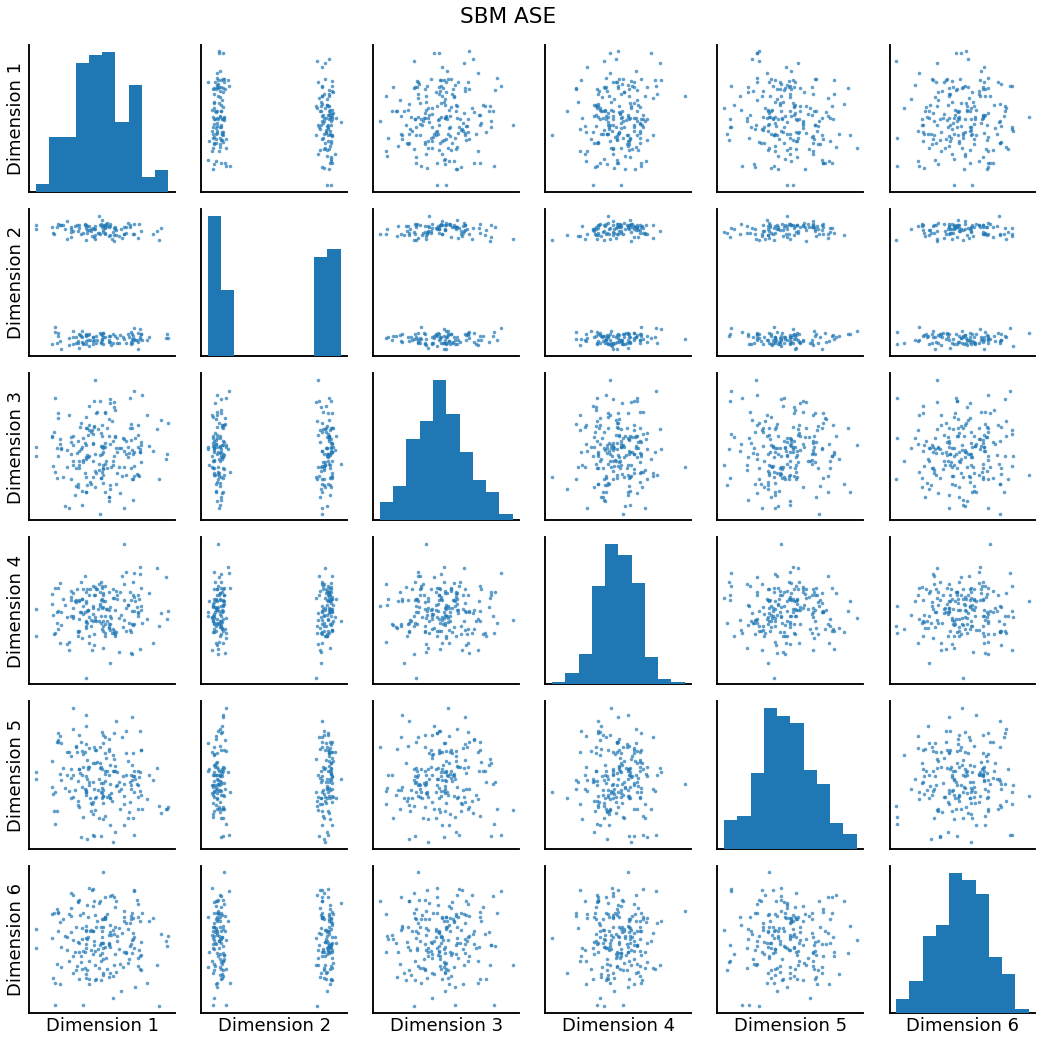

In [4]:
ase = AdjacencySpectralEmbed()
Xhat = ase.fit_transform(undirected_sbm)
pairplot(Xhat, title="SBM ASE")

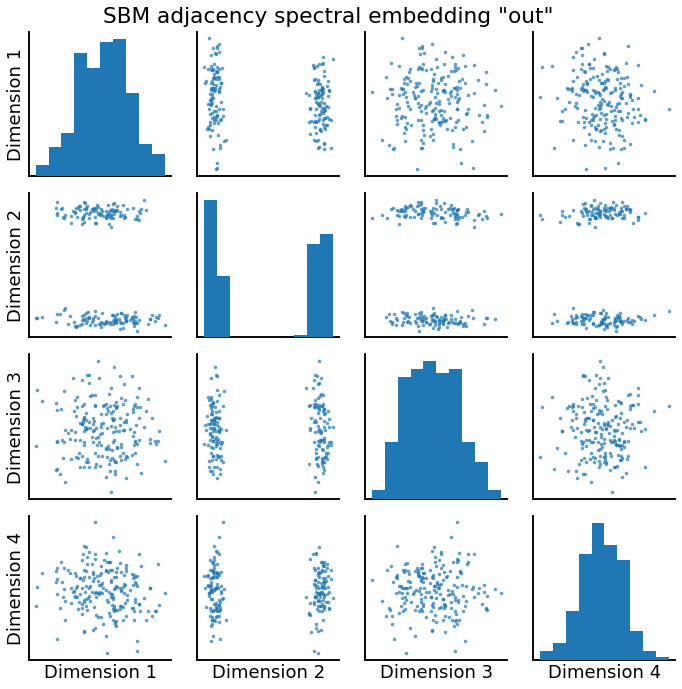

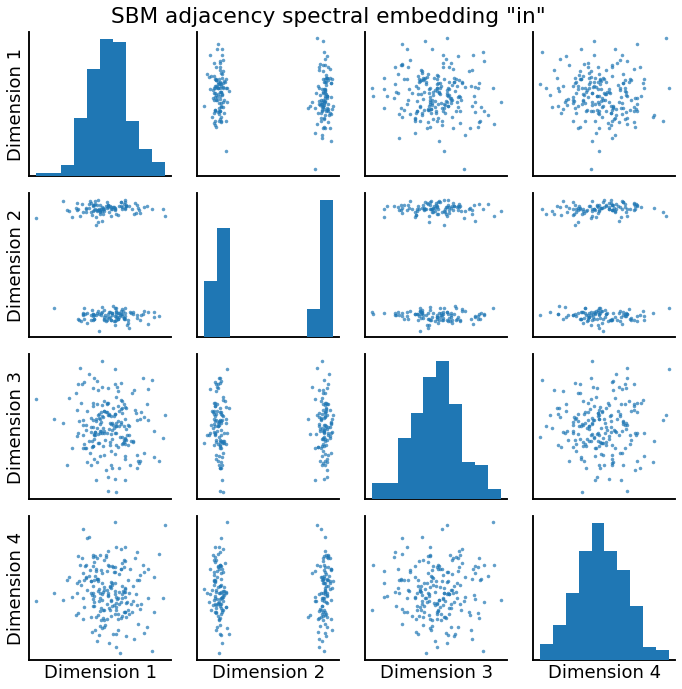

In [5]:
ase = AdjacencySpectralEmbed()
Xhat, Yhat = ase.fit_transform(directed_sbm)
pairplot(Xhat, title='SBM adjacency spectral embedding "out"')
pairplot(Yhat, title='SBM adjacency spectral embedding "in"')

### Embedding can have a specified number of dimensions

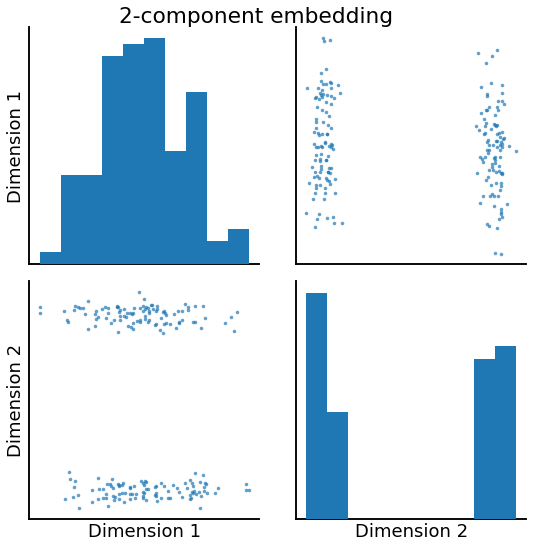

In [6]:
ase = AdjacencySpectralEmbed(n_components=2, algorithm='truncated')
Xhat = ase.fit_transform(undirected_sbm)
pairplot(Xhat, title="2-component embedding", height=4)

In [8]:
labels_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

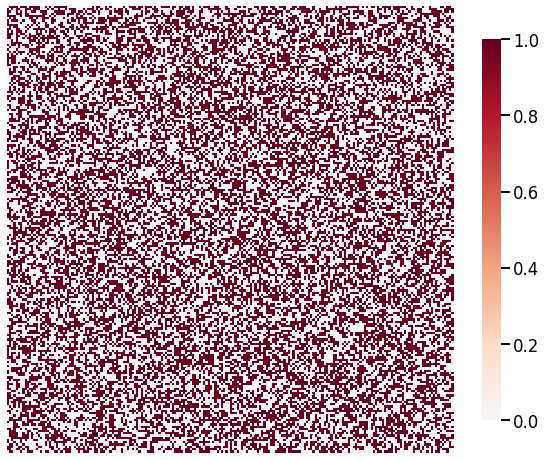

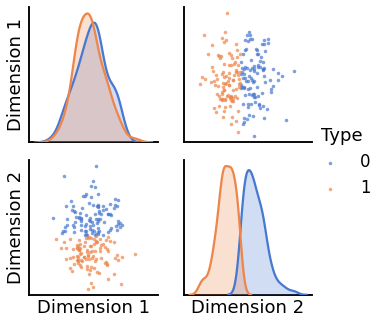

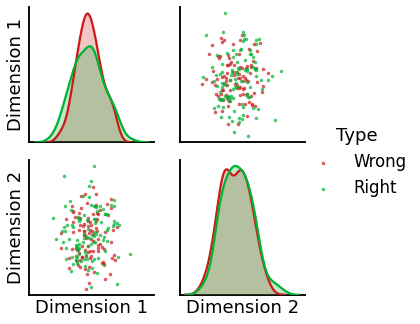

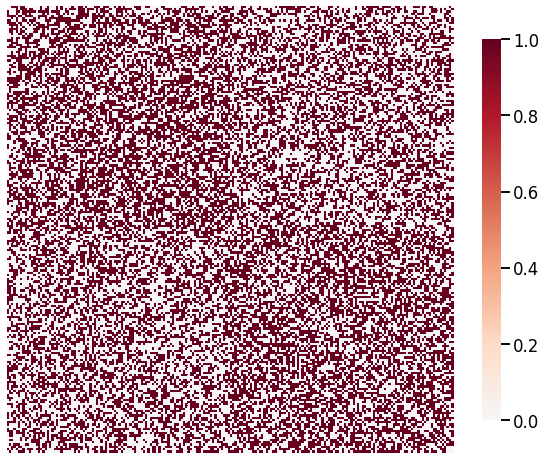

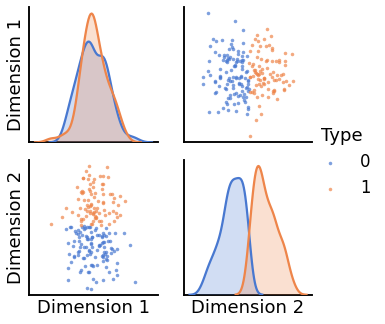

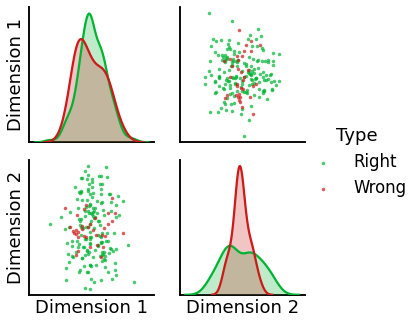

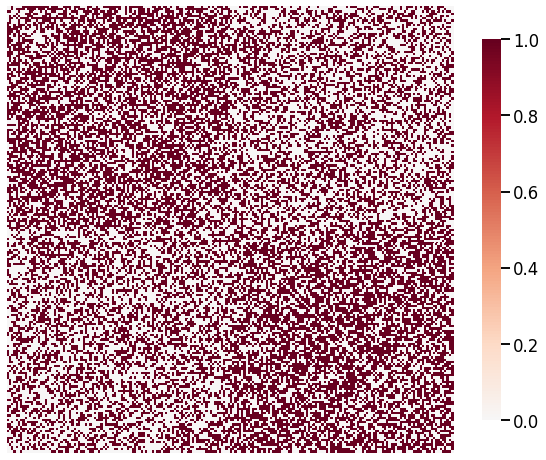

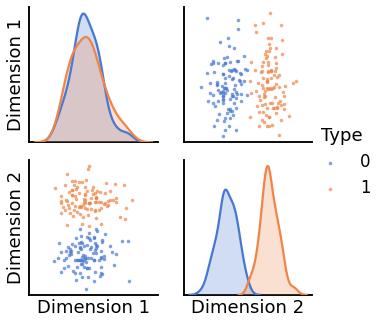

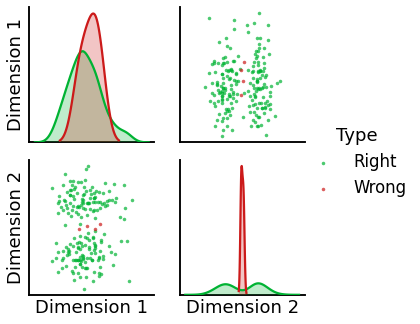

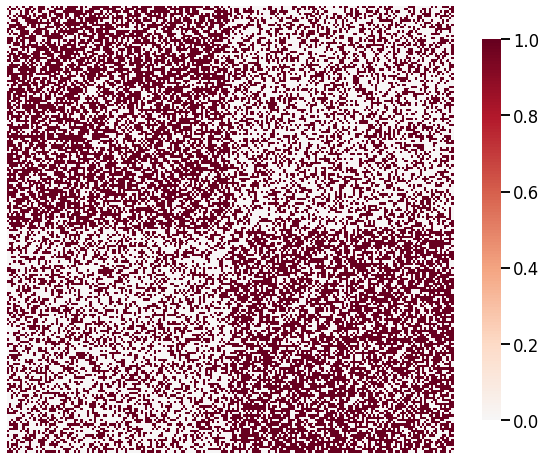

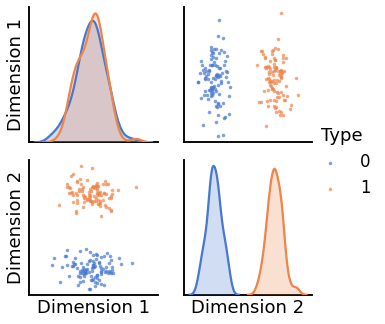

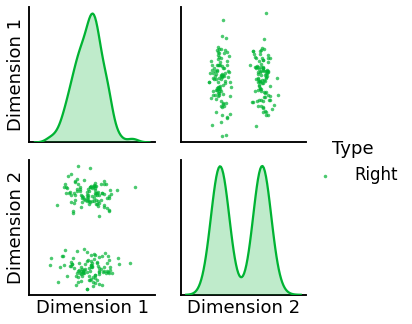

In [7]:
palette = {"Right": (0, .7, .2),
           "Wrong": (.8, .1, .1)}

for insularity in np.linspace(0.5, 0.625, 4):
    P = np.array([[insularity, 1-insularity],
                  [1-insularity, insularity]])
    sampled_sbm = sbm(2 * [nodes], P)
    heatmap(sampled_sbm)
    Xhat = AdjacencySpectralEmbed(n_components=2).fit_transform(sampled_sbm)
    labels_kmeans = KMeans(n_clusters=2).fit_predict(Xhat)
    ari = adjusted_rand_score(labels_sbm, labels_kmeans)
    error = labels_sbm - labels_kmeans
    error = error != 0
    if np.sum(error)/(2*nodes) > .5:
        error = error==0
    error_rate = np.sum(error) / (2 * nodes)
    error_label = (2 * nodes) * ["Right"]
    error_label = np.array(error_label)
    error_label[error] = "Wrong"
    
    pairplot(Xhat, labels=labels_kmeans,
             palette="muted")
    pairplot(Xhat, labels=error_label, palette=palette)

## Embedding multiple graphs

In [38]:
from graspy.simulations import sbm

n = [25, 25]
P1 = [[.3, .1],
      [.1, .7]]
P2 = [[.3, .1],
      [.1, .3]]

G1 = sbm(n, P1)
G2 = sbm(n, P2)

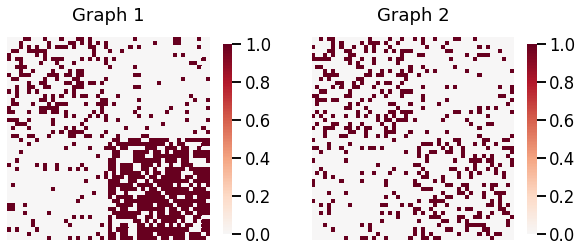

In [40]:
from graspy.plot import heatmap

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
heatmap(G1, ax=axes[0], title="Graph 1")
heatmap(G2, ax=axes[1], title="Graph 2")

In [58]:
G1.shape

(50, 50)

In [41]:
from graspy.embed import OmnibusEmbed

embedder = OmnibusEmbed()
Zhat = embedder.fit_transform([G1, G2])
print(Zhat.shape)

(2, 50, 2)


#### TODO: get a better sense for how to interpret the below graph

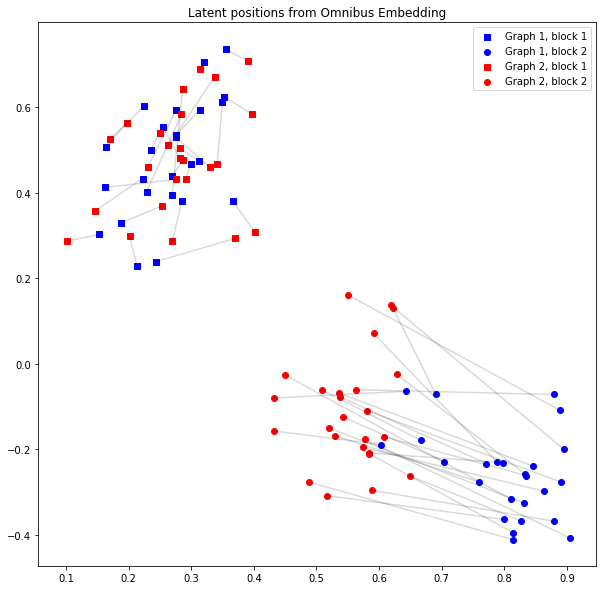

In [60]:
Xhat1 = Zhat[0]
Xhat2 = Zhat[1]

# plotting
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Xhat1[:25, 0], Xhat1[:25, 1], marker='s', c='b', label='Graph 1, block 1')
ax.scatter(Xhat1[25:, 0], Xhat1[25:, 1], marker='o', c='b', label='Graph 1, block 2')
ax.scatter(Xhat2[:25, 0], Xhat2[:25, 1], marker='s', c='r', label='Graph 2, block 1')
ax.scatter(Xhat2[25:, 0], Xhat2[25:, 1], marker='o', c='r', label='Graph 2, block 2')
ax.legend()

for i in range(50):
    ax.plot([Xhat1[i, 0], Xhat2[i, 0]], 
            [Xhat1[i, 1], Xhat2[i, 1]], 
            'black', alpha = 0.15)
    
ax.set_title("Latent positions from Omnibus Embedding");